In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import *
import numpy as np
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression

In [2]:
mn_test = pd.read_csv('/Users/cai/Downloads/CPS-Analytics/Quarter 4/ALY 6020/week 2/MNIST-data/mnist_test.csv', header = None)
mn_train = pd.read_csv('/Users/cai/Downloads/CPS-Analytics/Quarter 4/ALY 6020/week 2/MNIST-data/mnist_train.csv', header = None)


In [3]:
mn_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# test set
test_label = mn_test.iloc[:,0].replace([0,2,4,6,8], 0)
test_label = test_label.replace([1,3,5,7,9], 1)
test_data = mn_test.iloc[:,1:] 

#convert df to np array
test_data = test_data.to_numpy()
test_label = test_label.to_numpy()

In [5]:
# training set
train_label = mn_train.iloc[:,0].replace([0,2,4,6,8], 0)
train_label = train_label.replace([1,3,5,7,9], 1)
train_data = mn_train.iloc[:,1:] 

#convert df to np array
train_data = train_data.to_numpy()
train_label = train_label.to_numpy()

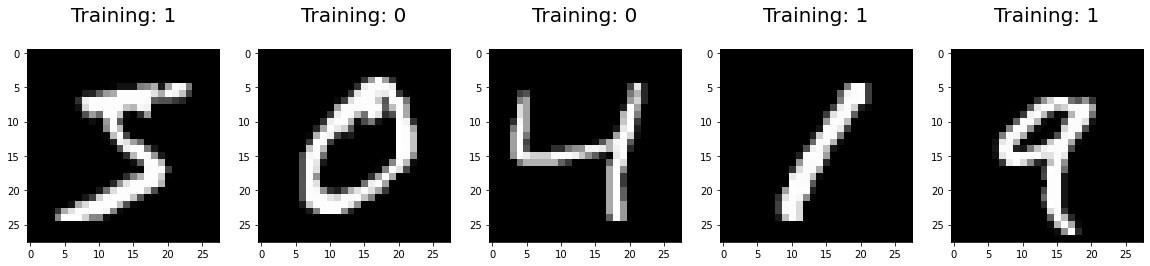

In [6]:
#Showing the Images and the Labels

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_data[0:5], train_label[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Modeling

In [7]:
#built logistic model and train it
clf = LogisticRegression(tol = 0.1, solver = 'saga')
clf.fit(train_data,train_label)

LogisticRegression(solver='saga', tol=0.1)

In [8]:
#make a prediction on entire test dataset
prediction = clf.predict(test_data)

# accuracy of the model
accuracy_score(prediction, test_label)

0.8995

In [9]:
clf.score(test_data, test_label)

0.8995

In [10]:

clf.predict(test_data[0].reshape(1,-1))
clf.predict(test_data[0:10])


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

# ROC

In [11]:
y_pre=clf.predict_proba(test_data)
y_pre

array([[1.51529588e-03, 9.98484704e-01],
       [9.90230931e-01, 9.76906936e-03],
       [9.21691797e-02, 9.07830820e-01],
       ...,
       [4.56629720e-01, 5.43370280e-01],
       [1.47751650e-01, 8.52248350e-01],
       [9.99334845e-01, 6.65155378e-04]])

In [12]:
y_0=list(y_pre[:,1]) 
fpr,tpr,thresholds=roc_curve(test_label,y_0)


i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]



,fpr,tpr,1-fpr,tf,thresholds
716,0.099269,0.900473,0.900731,-0.000258,0.481857


[Text(-200.0, 0, ''),
 Text(0.0, 0, ''),
 Text(200.0, 0, ''),
 Text(400.0, 0, ''),
 Text(600.0, 0, ''),
 Text(800.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(1200.0, 0, ''),
 Text(1400.0, 0, ''),
 Text(1600.0, 0, '')]

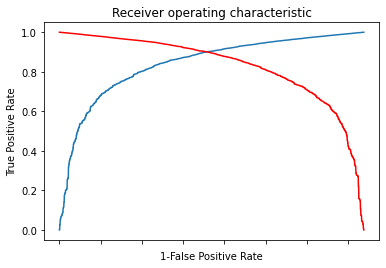

In [13]:
import pylab as pl

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [14]:
from sklearn import metrics
auc = metrics.auc(fpr, tpr)
auc



0.9595171326327318

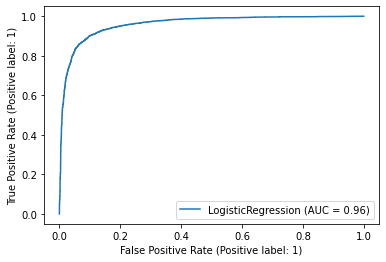

In [15]:
from sklearn.metrics import roc_auc_score,roc_curve
metrics.plot_roc_curve(clf, test_data, test_label)
plt.show()